In [1]:
#imports
import ccxt
import pandas as pd
import os
import time
from Historic_Crypto import HistoricalData
#from pytrends.request import TrendReq
#from twilio.rest import Client
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")

In [2]:
# twilio_client = Client(twilio_account_sid, twilio_auth_token)
exchange_id = 'coinbasepro'


In [3]:
def retrieve_historical_data(product,start_date):
    return HistoricalData(product, 86400, start_date).retrieve_data()


In [4]:
eth = retrieve_historical_data("ETH-USD", "2018-01-01-00-00")
btc = retrieve_historical_data("BTC-USD", "2018-01-01-00-00")
doge = retrieve_historical_data("DOGE-USD", "2018-01-01-00-00")
ltc = retrieve_historical_data("LTC-USD", "2018-01-01-00-00")

Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'ETH-USD' found at the CoinBase Pro API, continuing to extraction...
Data for chunk 0 of 4 extracted
Data for chunk 1 of 4 extracted
Data for chunk 2 of 4 extracted
Data for chunk 3 of 4 extracted
Data for chunk 4 of 4 extracted
Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction...
Data for chunk 0 of 4 extracted
Data for chunk 1 of 4 extracted
Data for chunk 2 of 4 extracted
Data for chunk 3 of 4 extracted
Data for chunk 4 of 4 extracted
Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase

In [5]:
eth

,low,high,open,close,volume
time,,,,,
2018-01-02,759.02,878.50,759.03,865.00,370299.269960
2018-01-03,850.11,949.98,865.00,938.31,306487.142497
2018-01-04,906.01,994.89,938.16,949.00,316803.962384
2018-01-05,935.00,1015.00,949.00,969.27,277363.742852
2018-01-06,961.23,1009.11,969.27,1006.68,126077.380266
...,...,...,...,...,...
2021-07-05,2160.00,2324.44,2323.27,2197.34,156103.936222
2021-07-06,2195.02,2350.00,2197.34,2321.84,165693.467204
2021-07-07,2294.16,2411.19,2322.20,2316.82,159702.044084


In [6]:
btc

,low,high,open,close,volume
time,,,,,
2018-01-02,13005.00,15275.00,13480.00,14781.51,26387.934934
2018-01-03,14628.00,15400.00,14781.52,15098.14,17877.495286
2018-01-04,14230.00,15400.00,15098.23,15144.99,20010.436342
2018-01-05,14819.78,17178.00,15145.00,16960.01,22917.780669
2018-01-06,16251.01,17174.00,16960.01,17098.99,14104.213920
...,...,...,...,...,...
2021-07-05,33156.86,35290.82,35284.06,33697.78,9607.606199
2021-07-06,33300.00,35100.00,33697.78,34225.73,10313.013681
2021-07-07,33770.01,35077.46,34225.72,33878.56,9404.897987


In [7]:
eth.columns = pd.MultiIndex.from_product([['ETH'], eth.columns])
eth

ETH                                          
                low     high     open    close         volume
time                                                         
2018-01-02   759.02   878.50   759.03   865.00  370299.269960
2018-01-03   850.11   949.98   865.00   938.31  306487.142497
2018-01-04   906.01   994.89   938.16   949.00  316803.962384
2018-01-05   935.00  1015.00   949.00   969.27  277363.742852
2018-01-06   961.23  1009.11   969.27  1006.68  126077.380266
...             ...      ...      ...      ...            ...
2021-07-05  2160.00  2324.44  2323.27  2197.34  156103.936222
2021-07-06  2195.02  2350.00  2197.34  2321.84  165693.467204
2021-07-07  2294.16  2411.19  2322.20  2316.82  159702.044084
2021-07-08  2084.00  2325.46  2317.64  2116.95  223830.003713
2021-07-09  2050.00  2160.00  2116.30  2109.19   82874.536056

[1285 rows x 5 columns]

In [8]:
btc.columns = pd.MultiIndex.from_product([['BTC'], btc.columns])
btc

BTC                                            
                 low      high      open     close        volume
time                                                            
2018-01-02  13005.00  15275.00  13480.00  14781.51  26387.934934
2018-01-03  14628.00  15400.00  14781.52  15098.14  17877.495286
2018-01-04  14230.00  15400.00  15098.23  15144.99  20010.436342
2018-01-05  14819.78  17178.00  15145.00  16960.01  22917.780669
2018-01-06  16251.01  17174.00  16960.01  17098.99  14104.213920
...              ...       ...       ...       ...           ...
2021-07-05  33156.86  35290.82  35284.06  33697.78   9607.606199
2021-07-06  33300.00  35100.00  33697.78  34225.73  10313.013681
2021-07-07  33770.01  35077.46  34225.72  33878.56   9404.897987
2021-07-08  32111.00  33934.62  33879.50  32875.95  14147.352525
2021-07-09  32255.24  33310.52  32875.95  32945.39   3079.442740

[1285 rows x 5 columns]

In [9]:
#Creating a dataframe
portfolio_data = pd.concat([eth, btc], axis="columns", join="inner")
#portfolio_data.columns = [Eth,Btc]
portfolio_data


ETH                                                 BTC  \
                low     high     open    close         volume       low   
time                                                                      
2018-01-02   759.02   878.50   759.03   865.00  370299.269960  13005.00   
2018-01-03   850.11   949.98   865.00   938.31  306487.142497  14628.00   
2018-01-04   906.01   994.89   938.16   949.00  316803.962384  14230.00   
2018-01-05   935.00  1015.00   949.00   969.27  277363.742852  14819.78   
2018-01-06   961.23  1009.11   969.27  1006.68  126077.380266  16251.01   
...             ...      ...      ...      ...            ...       ...   
2021-07-05  2160.00  2324.44  2323.27  2197.34  156103.936222  33156.86   
2021-07-06  2195.02  2350.00  2197.34  2321.84  165693.467204  33300.00   
2021-07-07  2294.16  2411.19  2322.20  2316.82  159702.044084  33770.01   
2021-07-08  2084.00  2325.46  2317.64  2116.95  223830.003713  32111.00   
2021-07-09  2050.00  2160.00  2116.30  2109.19   82874.536056  32255.24   

                                                        
                high      open     close        volume  
time                                                    
2018-01-02  15275.00  13480.00  14781.51  26387.934934  
2018-01-03  15400.00  14781.52  15098.14  17877.495286  
2018-01-04  15400.00  15098.23  15144.99  20010.436342  
2018-01-05  17178.00  15145.00  16960.01  22917.780669  
2018-01-06  17174.00  16960.01  17098.99  14104.213920  
...              ...       ...       ...           ...  
2021-07-05  35290.82  35284.06  33697.78   9607.606199  
2021-07-06  35100.00  33697.78  34225.73  10313.013681  
2021-07-07  35077.46  34225.72  33878.56   9404.897987  
2021-07-08  33934.62  33879.50  32875.95  14147.352525  
2021-07-09  33310.52  32875.95  32945.39   3079.442740  

[1285 rows x 10 columns]

In [10]:


# Configure a Monte Carlo simulation to forecast two year daily returns
MC_crypto = MCSimulation(
    portfolio_data = portfolio_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*2
)

#Print the simulation input data 
MC_crypto.portfolio_data.head()

ETH                                                        \
               low     high    open    close         volume daily_return   
time                                                                       
2018-01-02  759.02   878.50  759.03   865.00  370299.269960          NaN   
2018-01-03  850.11   949.98  865.00   938.31  306487.142497     0.084751   
2018-01-04  906.01   994.89  938.16   949.00  316803.962384     0.011393   
2018-01-05  935.00  1015.00  949.00   969.27  277363.742852     0.021359   
2018-01-06  961.23  1009.11  969.27  1006.68  126077.380266     0.038596   

                 BTC                                                          
                 low     high      open     close        volume daily_return  
time                                                                          
2018-01-02  13005.00  15275.0  13480.00  14781.51  26387.934934          NaN  
2018-01-03  14628.00  15400.0  14781.52  15098.14  17877.495286     0.021421  
2018-01-04  14230.00  15400.0  15098.23  15144.99  20010.436342     0.003103  
2018-01-05  14819.78  17178.0  15145.00  16960.01  22917.780669     0.119843  
2018-01-06  16251.01  17174.0  16960.01  17098.99  14104.213920     0.008195

In [11]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_df=MC_crypto.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

### Visualize the Results

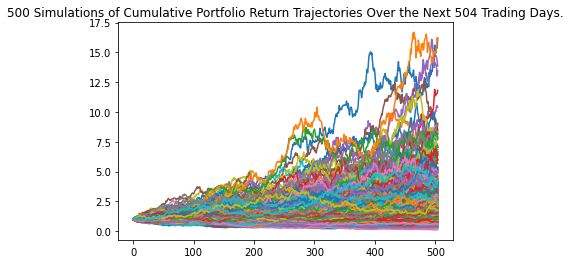

In [17]:
#Plot simulations
crypto_line_plot = MC_crypto.plot_simulation()
#df = px.data.gapminder().query("country=='Canada'")
#MC_df=MC_crypto
#fig=px.line(MC_crypto, x="days", y="Return", title="Cumulative Portfolio Return")
#fig.show()
#px.line(MC_df, x=MC_df.index, y=MC_df.columns)


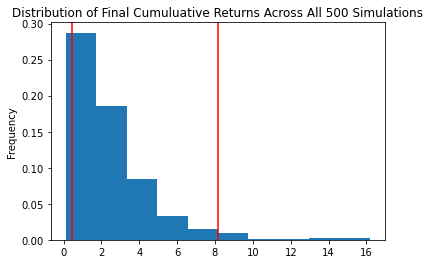

In [13]:
# Plot probability distribution and confidence intervals
dist_plot = MC_crypto.plot_distribution()

In [14]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = MC_crypto.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           500.000000
mean              2.502778
std               2.131169
min               0.115213
25%               1.127210
50%               1.839515
75%               3.213872
max              16.193982
95% CI Lower      0.449672
95% CI Upper      8.181990
Name: 504, dtype: float64


### Determine Upper and Lower Confidence Intervals

In [15]:
# Using lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our XXXX $15,000 investments in cryptocurrency
even_ci_lower = round(sum_stats[8]*15000,2)
even_ci_upper = round(sum_stats[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6745.08 and $122729.85.
